This is a Notebook for the capstone project, we will start by importing the needed libraries

In [0]:
import pandas as pd
import numpy as np

We will be using the dataset provided in the week 3,s notebook

In [68]:
df,df1,df2 = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
df= df[df['Borough']!='Not assigned']
df = df.groupby(['Postcode','Borough']).agg(','.join).reset_index()
df.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [69]:
i = 0
for v in df['Neighbourhood']:
  i = i+1
  if(v == 'Not assigned'):
    v = df['Borough'][i]
df.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


Now we will add the latitude and longitude part

In [70]:
dfc = pd.read_csv('http://cocl.us/Geospatial_data')
dfc['Postcode'] = dfc['Postal Code'] 

dffc = dfc.drop(columns = 'Postal Code')
dffc.head()

,Latitude,Longitude,Postcode
0,43.806686,-79.194353,M1B
1,43.784535,-79.160497,M1C
2,43.763573,-79.188711,M1E
3,43.770992,-79.216917,M1G
4,43.773136,-79.239476,M1H


In [71]:
dfm = pd.merge(df,dffc,on='Postcode')
dfm.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


For better understanding we will only use Neighbourhood,latitude and longitude columns

In [72]:
dff = dfm.drop(columns = 'Borough')
dff = dff.drop(columns = 'Postcode')
dff.head()

,Neighbourhood,Latitude,Longitude
0,"Rouge,Malvern",43.806686,-79.194353
1,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,Woburn,43.770992,-79.216917
4,Cedarbrae,43.773136,-79.239476


Now we move to the classification part

In [0]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans # import k-means from clustering stage
import folium # map rendering library

Foursquare credentials

In [0]:
CLIENT_ID = 'CDRWKACCUZYPXJHIHFT4YPQQF2CIQDROCKIXDQJX3SFYXF3N' 
CLIENT_SECRET = 'WC0UTM2XJN4KMP0GQA2GXR55JTNDXEI1QE0OHGRZBZ1E1SXV' 
VERSION = '20180605' 

Function for foursquare

In [0]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [77]:
dfv = getNearbyVenues(names=dff['Neighbourhood'], latitudes=dff['Latitude'], longitudes=dff['Longitude'])


Rouge,Malvern
Highland Creek,Rouge Hill,Port Union
Guildwood,Morningside,West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park,Ionview,Kennedy Park
Clairlea,Golden Mile,Oakridge
Cliffcrest,Cliffside,Scarborough Village West
Birch Cliff,Cliffside West
Dorset Park,Scarborough Town Centre,Wexford Heights
Maryvale,Wexford
Agincourt
Clarks Corners,Sullivan,Tam O'Shanter
Agincourt North,L'Amoreaux East,Milliken,Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview,Henry Farm,Oriole
Bayview Village
Silver Hills,York Mills
Newtonbrook,Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park,Don Mills South
Bathurst Manor,Downsview North,Wilson Heights
Northwood Park,York University
CFB Toronto,Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens,Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West,Riverdale
The Beaches West,Indi

In [78]:
dfv.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge,Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Guildwood,Morningside,West Hill",43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place
3,"Guildwood,Morningside,West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
4,"Guildwood,Morningside,West Hill",43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant


In [79]:
dffv = pd.get_dummies(dfv[['Venue Category']], prefix="", prefix_sep="")
dffv['Neighbourhood'] = dfv['Neighborhood']
dffv = dffv.groupby('Neighbourhood').mean()
dfffv = dffv.groupby('Neighbourhood').mean().reset_index()
arcl = dffv.to_numpy()
dffv.head()

,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
Neighbourhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

Now we will find the most frequent venues

In [80]:
i=0
dfft = pd.DataFrame()
for i in range(0,99):
    temp = dffv.iloc[i:i+1].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    dft = temp.sort_values('freq', ascending=False).reset_index(drop=True).head()
    dfft[i] = dft['venue'].T
arr = dfft.T.to_numpy()
arr

array([['Coffee Shop', 'Café', 'Thai Restaurant', 'Bar', 'Steakhouse'],
       ['Skating Rink', 'Print Shop', 'Chinese Restaurant', 'Lounge',
        'Sandwich Place'],
       ['Playground', 'Asian Restaurant', 'Park',
        'Modern European Restaurant', 'Museum'],
       ['Grocery Store', 'Pizza Place', 'Fast Food Restaurant',
        'Beer Store', 'Fried Chicken Joint'],
       ['Pizza Place', 'Athletics & Sports', 'Pharmacy', 'Pub',
        'Coffee Shop'],
       ['Coffee Shop', 'Pizza Place', 'Pharmacy',
        'Middle Eastern Restaurant', 'Fast Food Restaurant'],
       ['Japanese Restaurant', 'Bank', 'Chinese Restaurant', 'Café',
        'Neighborhood'],
       ['Sushi Restaurant', 'Coffee Shop', 'Italian Restaurant', 'Pub',
        'Sandwich Place'],
       ['Coffee Shop', 'Beer Bar', 'Italian Restaurant',
        'Farmers Market', 'Bakery'],
       ['General Entertainment', 'College Stadium', 'Café',
        'Skating Rink', 'Afghan Restaurant'],
       ['Convenience Store', 

In [81]:
dff1 = pd.DataFrame(data = arr,columns={'1','2','3','4','5'})
dff['first'] = dff1['1']
dff['second'] = dff1['2']
dff['third'] = dff1['3']
dff['fourth'] = dff1['4']
dff['fifth'] = dff1['5']
dff.head()

,Neighbourhood,Latitude,Longitude,first,second,third,fourth,fifth
0,"Rouge,Malvern",43.806686,-79.194353,Thai Restaurant,Café,Steakhouse,Coffee Shop,Bar
1,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,Chinese Restaurant,Print Shop,Sandwich Place,Skating Rink,Lounge
2,"Guildwood,Morningside,West Hill",43.763573,-79.188711,Park,Asian Restaurant,Museum,Playground,Modern European Restaurant
3,Woburn,43.770992,-79.216917,Fast Food Restaurant,Pizza Place,Fried Chicken Joint,Grocery Store,Beer Store
4,Cedarbrae,43.773136,-79.239476,Pharmacy,Athletics & Sports,Coffee Shop,Pizza Place,Pub


Now we will find the optimum clusters

In [82]:
dfcl = dfffv.drop(columns='Neighbourhood')
dfcl.head()

,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.01,0.01,0.0,0.030000,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.04,

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [84]:
k = 1
sqd = []
while(k<100):
    km = KMeans(n_clusters=k)
    km = km.fit(dfcl)
    sqd.append(km.inertia_)
    k = k+1
sqd

[18.033112259661365,
 16.26045891677328,
 15.256591540500825,
 14.280668196545271,
 13.548430421531481,
 13.037676038323596,
 12.398235980102326,
 11.828438414006131,
 11.439759813747948,
 10.640518974119981,
 10.491792584502782,
 10.225295779497976,
 9.779344565882914,
 9.667770998445315,
 9.120120456549403,
 8.855550060026687,
 8.671461066421344,
 8.292245519940188,
 7.888648930395582,
 7.823184978638545,
 7.4382073963116255,
 7.200839811570433,
 7.001095039346073,
 6.711114023498444,
 6.524462289971681,
 6.148072096150476,
 5.969320109982008,
 5.746114380260282,
 5.503191586909993,
 5.330684390824972,
 4.986149366868278,
 4.898746841858044,
 4.760088209845718,
 4.586731082533293,
 4.5055870673409455,
 4.240050107443562,
 4.1427339102083165,
 3.913173198324037,
 3.7224466184892817,
 3.5846645906428396,
 3.4806694874300077,
 3.313751089584174,
 3.0955705581554227,
 3.048593784679466,
 2.8325564981857356,
 2.7643662662565096,
 2.624033038695151,
 2.568781388513866,
 2.3804167690098863,

Visualisation of the elbow curve

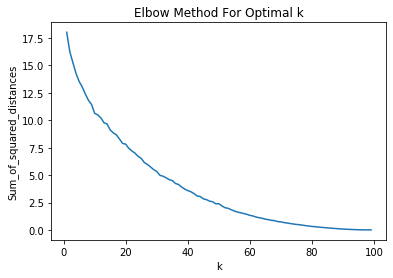

In [85]:
K = range(1,100)
plt.plot(K,sqd)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

So 22 seems like the optimal k, training the model with k=22

In [86]:
km = KMeans(n_clusters=22).fit(dfcl)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=22, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

This Kmeans model can be used to predict ideal options for a person shifting to Toronto, a person can use various optins falling under a cluster and can can even predict the ideal buissness idea or strategy considering the most frequent shops